In [4]:
# Analytical Value of Q as found in Kippenberg's thesis
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [5]:
# Vacuum Wavelength of source
wvln = 1.538  # micrometers
# wvln = 0.852359 # for quartz example given by buck, kimble 2003

# Gaussian Pulse Source parameters
freq = 1 / wvln
fcen = freq
print("Frequency = " + str(fcen))
# cen = 0.6496971259430409
df = 0.01

n = 3.4483 + 1j * 1.0901e-13
# n = 1.45246 # quartz again

# Setting real and complex permitivities, and material loss
# complexPerm = 0
# realPerm = 12
perm = np.power(n, 2)
complexPerm = np.imag(perm)
realPerm = np.real(perm)
cond = 2 * np.pi * freq * complexPerm / realPerm

# Refractive index and ratio with index outside resonator
n = np.sqrt(realPerm)
q = n / 1

nrad = 1  # Set to 1 to get fundamental whispering gallery modes

# Which zero of the airy function we need
azs = special.ai_zeros(nrad)[0]
az = azs[nrad - 1]


def m2r(x):
    return 1 / (2 * np.pi * freq) * (x + 1 / 2 + az * ((x + 1 / 2) / 2) ** (1 / 3) - q / np.sqrt(q ** 2 - 1)
                                     + 3 * az / (2 ** (2 / 3) * 10 * (x + 1 / 2) ** (1 / 3)) + q ** 3 * az
                                     / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * (x + 1 / 2) ** (2 / 3)))


def m2rvar(x):
    return 1 / (2 * np.pi * freq) * (x + az * (x / 2) ** (1 / 3) - q / np.sqrt(q ** 2 - 1)
                                     + 3 * az / (2 ** (2 / 3) * 10 * x ** (1 / 3)) + q ** 3 * az
                                     / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * x ** (2 / 3)))


def qkippenberg(x):
    # k = 2 * np.pi / 1530  # Fix this when i find out what they mean by k
    k = 0.1
    beta = ((x + 1 / 2) / 2) ** (1 / 3)
    Tnl = (x + 1 / 2) * (np.arccosh(nrad) - np.sqrt(1 - 1 / (q ** 2))) + beta * az * np.sqrt(1 - 1 / (q ** 2))
    return 1 / 2 * (x + 1 / 2 - beta * az - x ** (1 - 2 * k) / np.sqrt(x ** 2 - 1)) * x ** (-1 + 2 * k) * (
            x ** 2 - 1) ** (1 / 2) * np.exp(2 * Tnl)


def qbuck(x):
    b = 0  # TE modes
    xi = (1 / 2 * (x + 1 / 2)) ** (1 / 3)
    eta = np.arccosh(n * (1 - 1 / (x + 1 / 2) * (az * xi + x ** (1 - 2 * b) / np.sqrt(x ** 2 - 1))) ** (-1))
    Tl = (x + 1 / 2) * (eta - np.tanh(eta))
    return 1 / 2 * (x + 1 / 2) * n ** (1 - 2 * b) * (n ** 2 - 1) ** (1 / 2) * np.exp(2 * Tl)


# Size of resonator and waveguide, using schillers approx
"""
r = 1 / (2 * np.pi * freq) * (m + 1 / 2 + az * ((m + 1) / 3) ** (1 / 3)
                              - q / np.sqrt(q ** 2 - 1) + 3 * az / (2 ** (2 / 3) * 10 * (m + 1 / 2) ** (1 / 3))
                              + q ** 3 * az / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * (m + 1 / 2) ** (3 / 2)))
"""

Frequency = 0.6501950585175552


'\nr = 1 / (2 * np.pi * freq) * (m + 1 / 2 + az * ((m + 1) / 3) ** (1 / 3)\n                              - q / np.sqrt(q ** 2 - 1) + 3 * az / (2 ** (2 / 3) * 10 * (m + 1 / 2) ** (1 / 3))\n                              + q ** 3 * az / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * (m + 1 / 2) ** (3 / 2)))\n'

In [6]:
m = np.arange(20, 251, 1)
r = m2r(m)
Qrad = qbuck(m)

Q = 1/(1/Qrad)

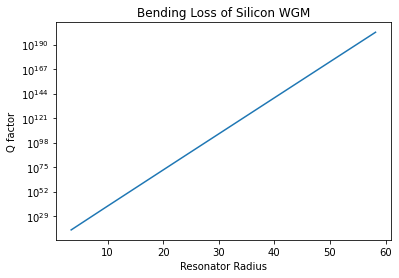

In [7]:
fig1, ax1 = plt.subplots()

ax1.plot(r, Q)
# ax1.set_xlabel("Azimuthal mode number (m)")
ax1.set_xlabel("Resonator Radius")
ax1.set_ylabel("Q factor")
ax1.set_yscale('log')
ax1.set_title("Bending Loss of Silicon WGM")

plt.show()